# 01_datawork

Munkhtsetseg

Library

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Import the dataset and remove the duplicates

Import the dataset from the directory of: ~/Data Input/Preprocessing data/Preprocessing data.csv, assign the dataset as object of df:

In [ ]:
df <- read.csv("~/Data Input/Preprocessing data/Preprocessing data.csv")


Remove the duplicates with the function of distinct(), assign the dataset as df_01:

In [ ]:
df_00 <- df |>
  distinct() |>
  rename(correct_PM10 = PM2, correct_PM2 = PM10) |>
  mutate(PM10=correct_PM10, PM2=correct_PM2, PM10_rel=PM10, PM2_rel=PM2, ratio = PM2/PM10)


## Produce a table with missing data

In [ ]:
df_000 <- df_00 |>
   filter(Year<2019 & Year >2008)



df_01 <- df_000 |>
  rowwise() |>
filter((Year != 2019 & Station.name == "Zamynuud") | 
       (Year < 2016 & Station.name == "Sainshand") |
       (Year < 2021 & Station.name == "UB") |
       (Year < 2017 & Station.name == "Dalanzadgad")
       )
head(df_01)


# A tibble: 6 × 19
# Rowwise: 
   Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS   WS.u
  <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>  <dbl>
1  2009     1     1     0        0.087       0.073       3366   252 1.08   1.02 
2  2009     1     1     1        0.2         0.175       1999   317 0.546  0.374
3  2009     1     1     2        0.309       0.266       6756    87 1.03  -1.03 
4  2009     1     1     3        0.105       0.089       9559   121 1.03  -0.885
5  2009     1     1     4        0.063       0.052      17664   121 0.46  -0.393
6  2009     1     1     5        0.027       0.021      11348    92 2.05  -2.05 
# ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
#   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

#### For date options as year, month, etc:

In [ ]:
Table_NA_by_Year <- df_01 |>
  group_by(Station.name,Year) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
            ) 


`summarise()` has grouped output by 'Station.name'. You can override using the
`.groups` argument.

# A tibble: 35 × 9
# Groups:   Station.name [4]
   Station.name  Year NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
   <chr>        <int>   <int>  <int>   <int>  <int> <int> <int>  <int>
 1 Dalanzadgad   2009    8760    929     715    659   748   748   8760
 2 Dalanzadgad   2010    8784   1086     921    756   787   787   8784
 3 Dalanzadgad   2011    8760   3309    2652   1759  2394  2394   8760
 4 Dalanzadgad   2012    5088   3016    1074    693  1412  1412   5088
 5 Dalanzadgad   2013    6096   1809    1766   2479  1240  1240   6096
 6 Dalanzadgad   2014    7800    921     843   6068  1482  1482   7800
 7 Dalanzadgad   2015    8760   1587    1539   8115  2635  2635   8760
 8 Dalanzadgad   2016    6288   1613    1654   5995  3306  3306   6288
 9 Sainshand     2009    8688    424     376    423   587   587   8688
10 Sainshand     2010    8784   2577    2557   1113  1210  1210   8784
# ℹ 25 more rows

#### For station

In [ ]:
Table_NA_by_Station <- df_01 |>
  group_by(Station.name) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) 
Table_NA_by_Station


# A tibble: 4 × 8
  Station.name NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
  <chr>          <int>  <int>   <int>  <int> <int> <int>  <int>
1 Dalanzadgad    60336  14270   11164  26524 14004 14004  60336
2 Sainshand      59040  11929   11727   9320  8527  8527  59040
3 UB             76656   8716    7879   3770  4053  4053  43415
4 Zamynuud       67392  10075    8880   3444  4960  4960  67392

### By percentages

In [ ]:
Table_NA_by_Station_percentage <- df_01 |>
  group_by(Station.name, Year) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) |> 
  mutate(
            NA_PM2p = if_else(NA_date != NA_PM2, NA_PM2/NA_date*100, 0)
  ) |>
  do({
    PM10_perc <- .$NA_PM2*100/.$NA_date; 
      missing_PM10 <-mean(PM10_perc); 
      attr(missing_PM10, "data.all") <- PM10_perc; 
    PM2_perc <- .$NA_PM10*100/.$NA_date; 
      missing_PM2 <- mean(PM2_perc); 
      attr(missing_PM2, "data.all") <- PM2_perc;
    Vis_perc <- .$NA_Vis*100/.$NA_date; 
      missing_Vis <- mean(Vis_perc); 
      attr(missing_Vis, "data.all") <- Vis_perc; 
    WS_perc <- .$NA_WS*100/.$NA_date; 
      missing_WS <- mean(WS_perc); 
      attr(missing_WS, "data.all") <- WS_perc; 
    WD_perc <- .$NA_WD*100/.$NA_date; 
      missing_WD <- mean(WD_perc); 
      attr(missing_WD, "data.all") <- WD_perc; 
  data.frame(missing_PM2, missing_PM10, missing_Vis, missing_WS, missing_WD)}) 


`summarise()` has grouped output by 'Station.name'. You can override using the
`.groups` argument.

# A tibble: 4 × 6
# Groups:   Station.name [4]
  Station.name missing_PM2 missing_PM10 missing_Vis missing_WS missing_WD
  <chr>              <dbl>        <dbl>       <dbl>      <dbl>      <dbl>
1 Dalanzadgad         19.2         25.7       44.5       24.3       24.3 
2 Sainshand           19.7         20.0       15.7       14.6       14.6 
3 UB                  11.0         11.9        4.53       4.85       4.85
4 Zamynuud            12.7         14.4        5.49       7.44       7.44

## Note that:

We use the data in the period of 2009-2018, which has been regarded as a monitoring work stabilized since 2008 when is the beginning of the monitoring. According to NIES, site maintenance was consistent up to 2018.

+Sainshand site, data 2009-2015 get used; + Dalanzad site: 2009-2016. + UB: 2009-2018 + Zamyn uud: 2009-2018

# Remove the spikes, and produce an extended table

Remove the spikes in the datasets, and produce the table with NA, with removed spikes; express it in a percentages. #\| Comments\*kedjkdjk \### Remove the spikes Method 1. Mean value +- (3-5)SD - Find Monthly mean #\| flow: 1st - Remove spikes PMs \>10 mgm/hour is unreasonable. #\| - Exclude 0 values in PMs.

# A tibble: 6 × 19
# Rowwise: 
   Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS  WS.u
  <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl> <dbl>
1  2009     1     9    21        0.003       0.002      20000    NA NA    NA   
2  2009     1    16    19        0.006       0.001      20000   278  7.14  7.08
3  2009     1    16    20        0.005       0.001      20000   276  6.42  6.38
4  2009     1    16    22        0.008       0.002      20000   276  7.74  7.71
5  2009     1    16    23        0.007       0.002      20000   286  5.55  5.33
6  2009     2     5    19        0.006       0.001      20000   274  3.49  3.49
# ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
#   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

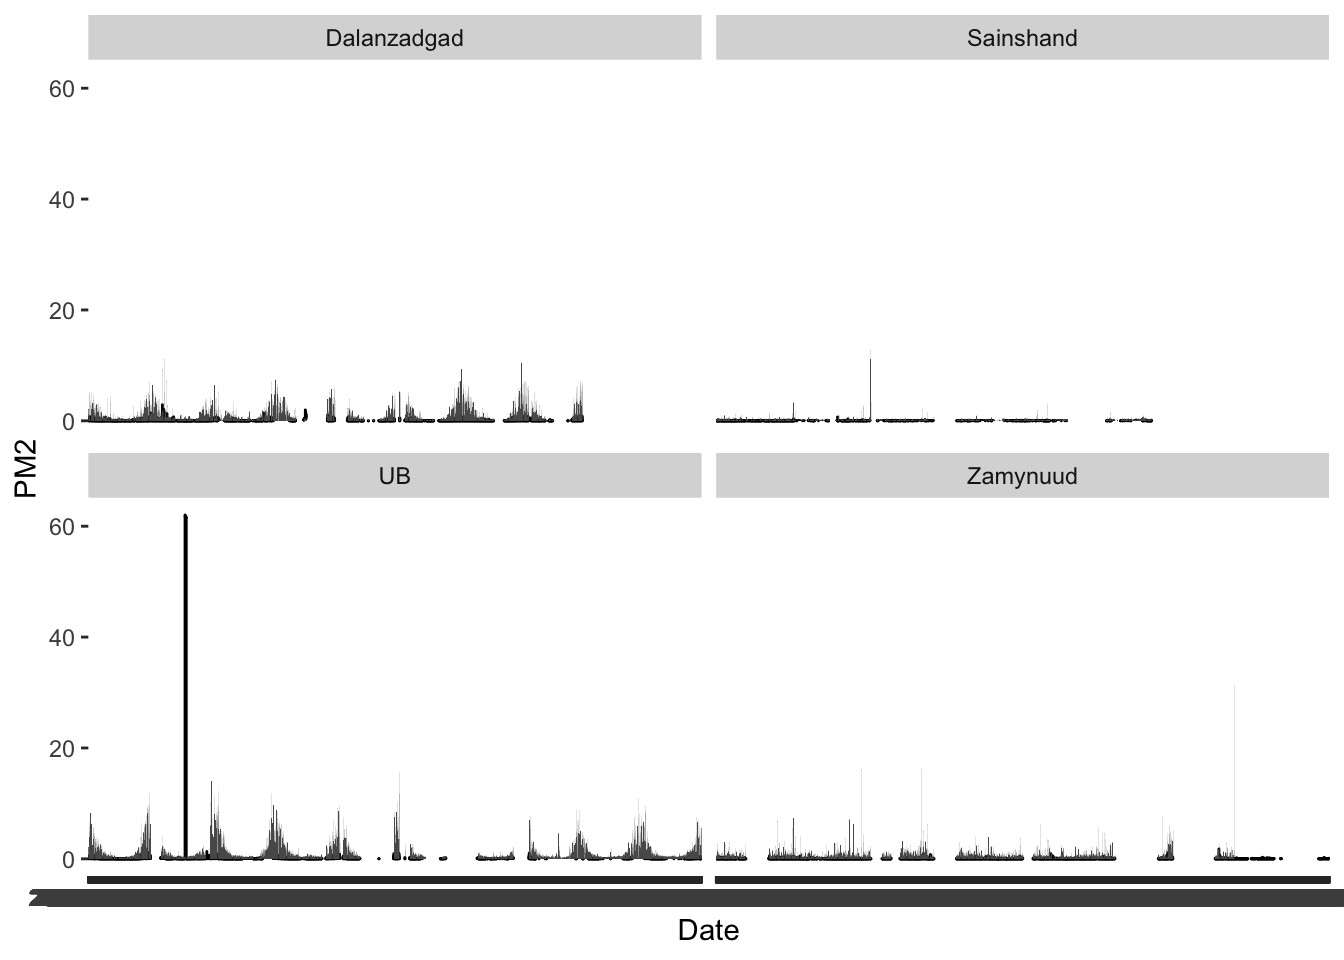

In [ ]:
df_10 <- df_01 |>
  filter(PM10 < 0.003 | PM2 < 0.003) 
head(df_10)


#\| flow: 2nd - ratio check. PM10 \>= PM2.5

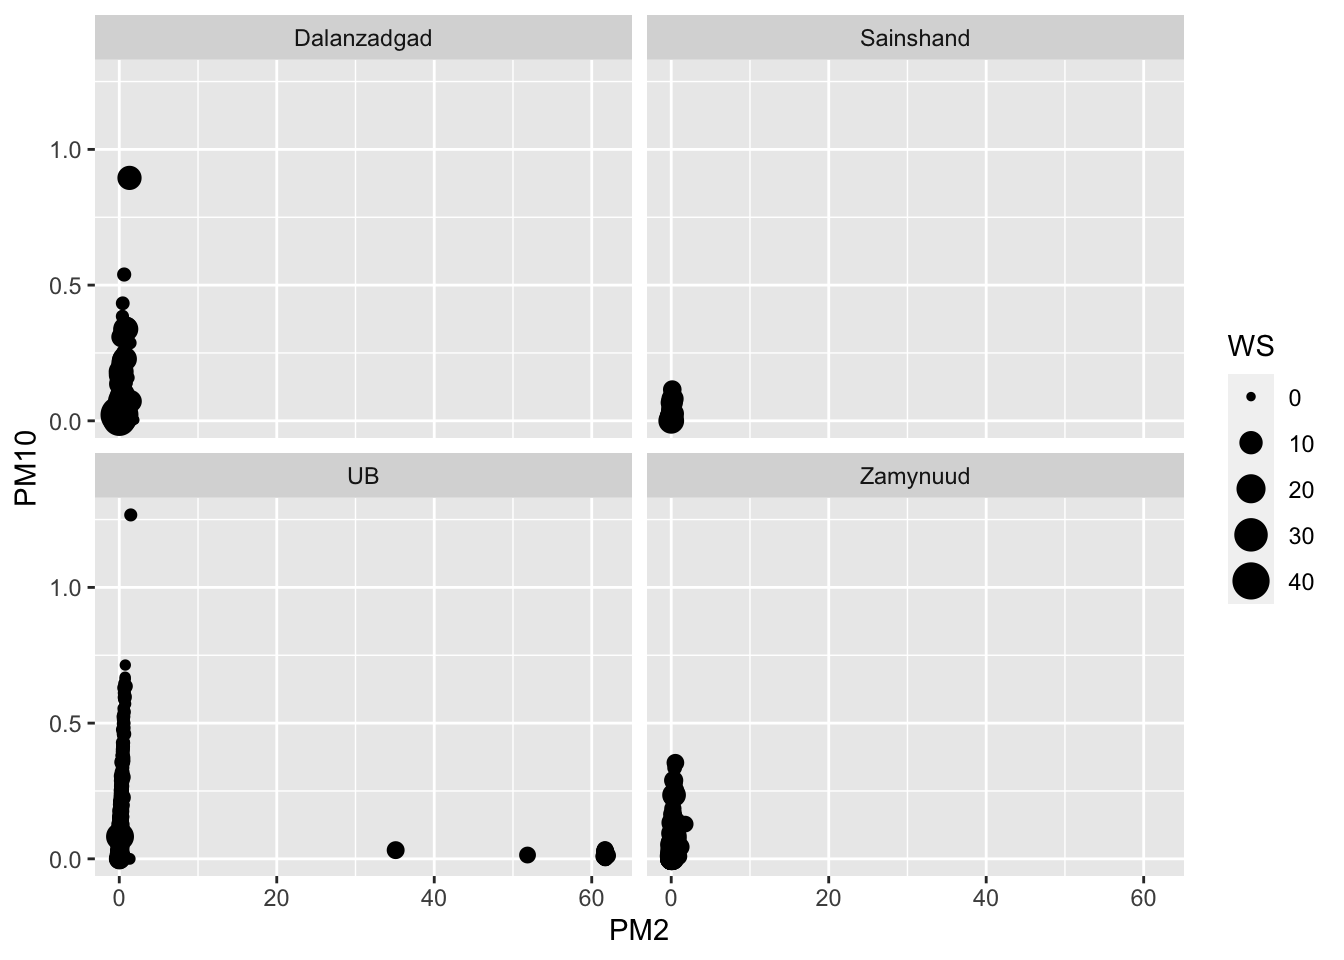

In [ ]:
df_01 |>
  filter(ratio >1) |>
  ggplot(aes(x=PM2, y=PM10, size=WS)) +
  geom_point() +
  facet_wrap(~Station.name)


#\| flow: 2nd - ratio check. remove data of ratio\>1

# A tibble: 6 × 19
# Rowwise: 
   Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS   WS.u
  <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>  <dbl>
1  2009     1     1     0        0.087       0.073       3366   252 1.08   1.02 
2  2009     1     1     1        0.2         0.175       1999   317 0.546  0.374
3  2009     1     1     2        0.309       0.266       6756    87 1.03  -1.03 
4  2009     1     1     3        0.105       0.089       9559   121 1.03  -0.885
5  2009     1     1     4        0.063       0.052      17664   121 0.46  -0.393
6  2009     1     1     5        0.027       0.021      11348    92 2.05  -2.05 
# ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
#   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

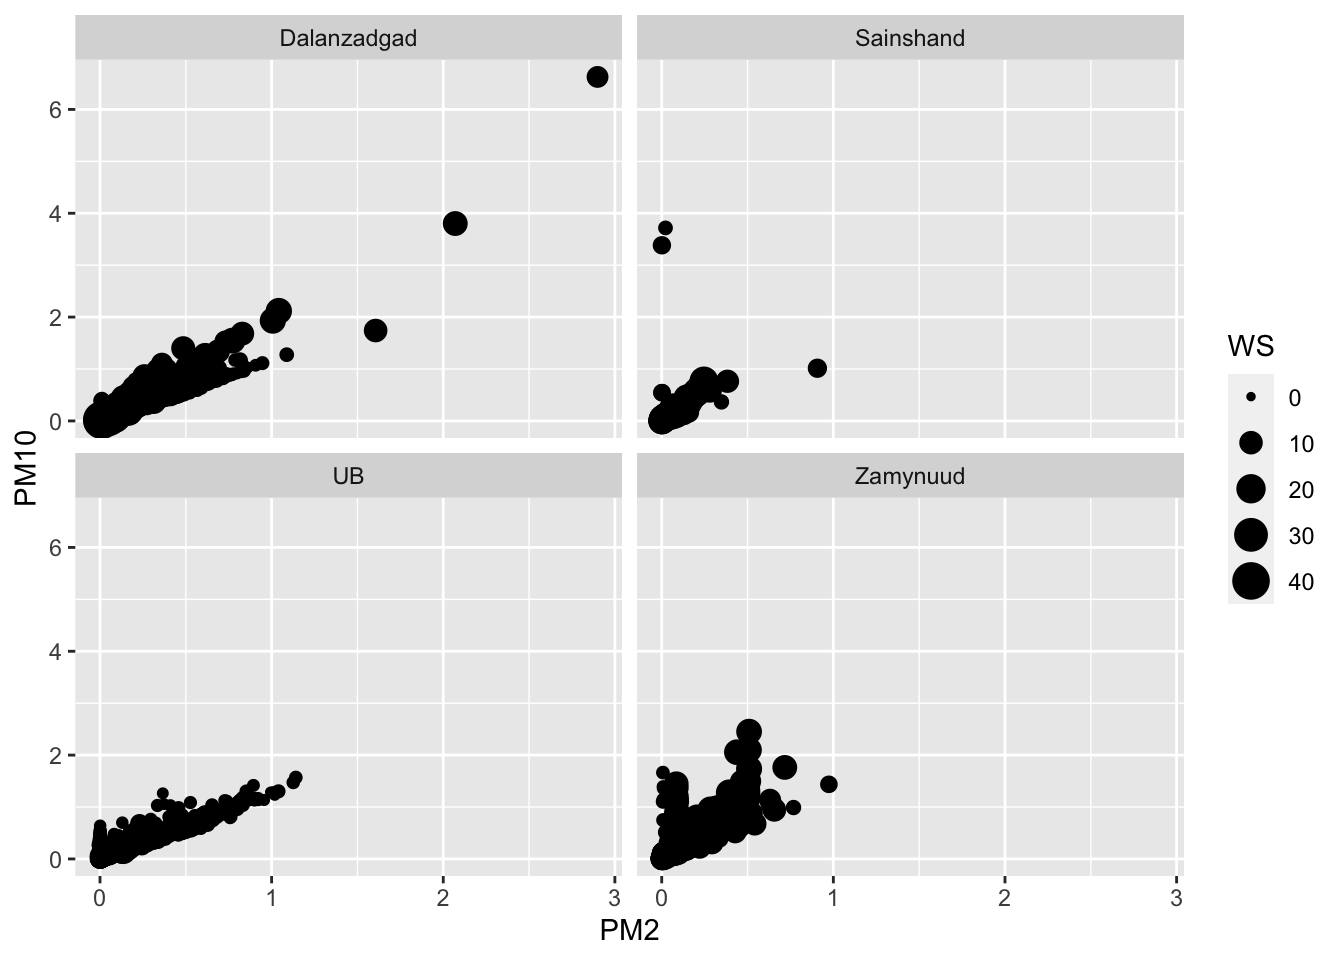

In [ ]:
df_01 <- df_01 |>
  filter(PM2<10 & PM10<10 & PM10 != 0 & PM2 != 0 & ratio < 1) 
head(df_01)


#\| flow: 2nd - Method 1. Mean value +- (3-5)SD - Monthly mean at stations #\| output: false

Option 1:

# A tibble: 2,637 × 19
# Groups:   Station.name, Month [48]
    Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
   <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
 1  2009     1     5    16        0.594       0.509       1814   260 0.788
 2  2009     1     6     0        0.641       0.547        744   248 1.23 
 3  2009     1     6     1        0.867       0.728       1093   277 0.738
 4  2009     1     6     2        0.705       0.597       1723     0 1.62 
 5  2009     1     9     1        0.756       0.656        992   292 0.429
 6  2009     1     9     2        0.709       0.612       2098    55 1    
 7  2009     1    15    12        0.818       0.718       5941   147 0.633
 8  2009     1    16     1        0.742       0.556       2125   120 0.274
 9  2009     1    30     1        0.915       0.797       1315     9 0.366
10  2009     1    30     2        0.601       0.507       2485   309 0.713
# ℹ 2,627 more rows
# ℹ 10 more variable

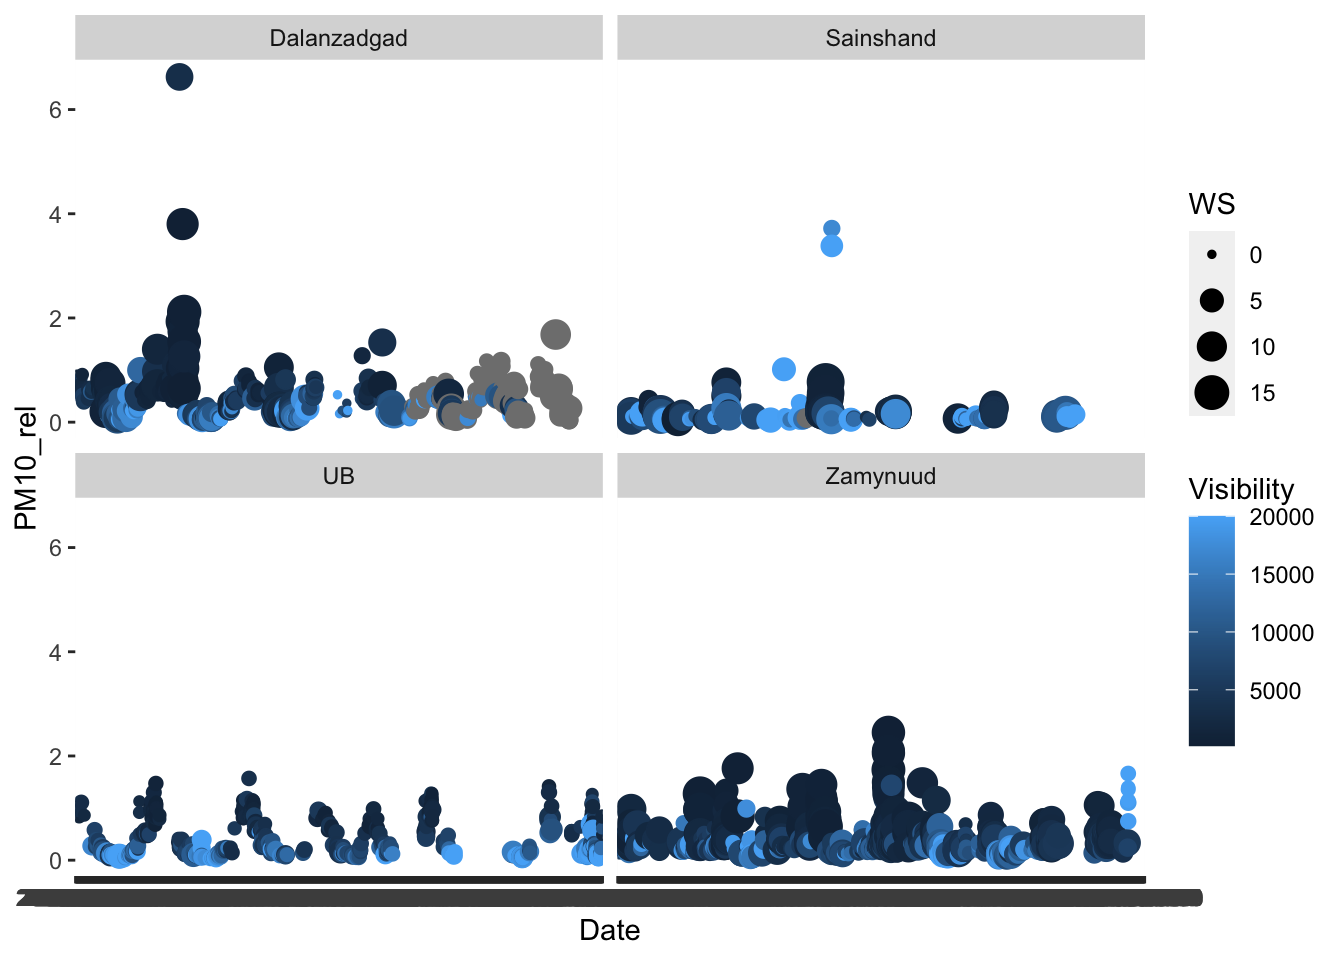

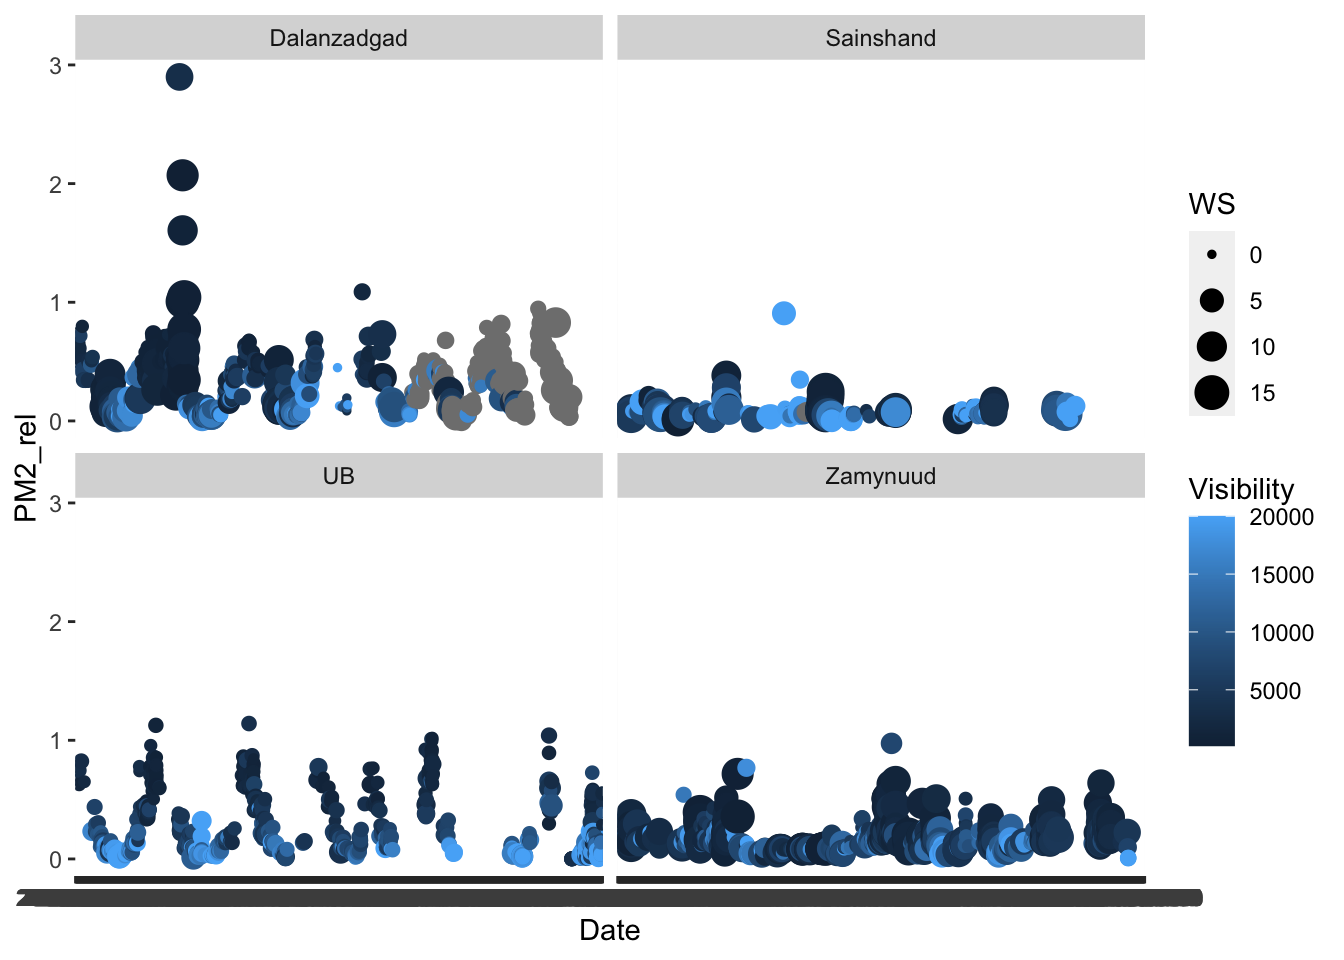

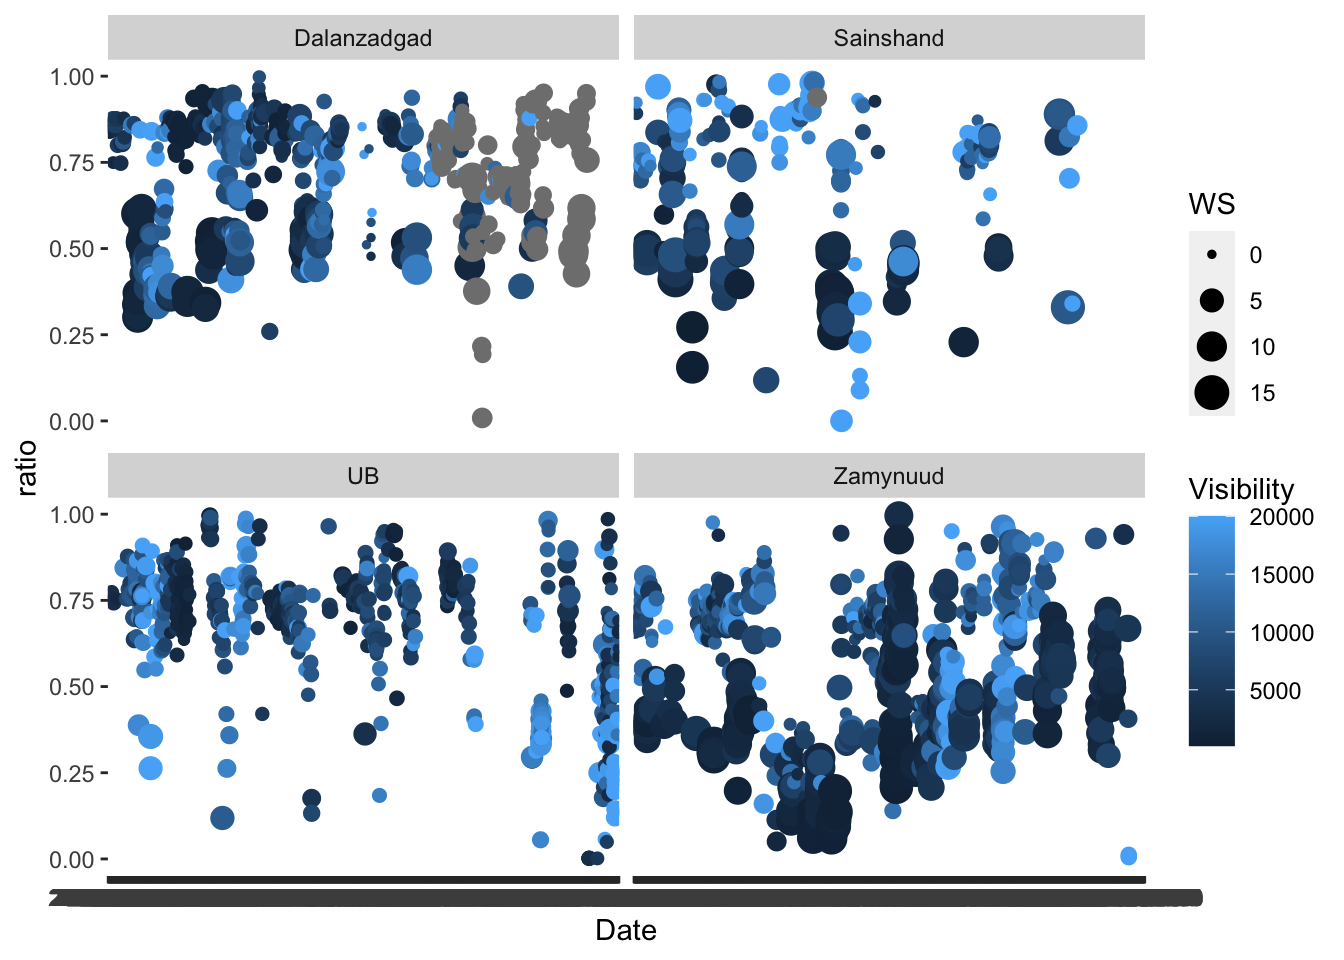

In [ ]:
df_02a <- df_01 |>
  group_by(Station.name, Month) |>
  drop_na(PM2, PM10) |>
  filter(PM2<10 & PM10<10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(.), sd(.) * 3), ., "Outlier")) |>
  dplyr::filter_if(is.character, any_vars(. == "Outlier"))
df_02a


Option 2:

In [ ]:
df_02a1 <- df_01 |>
  group_by(Station.name, Month) |>
  drop_na(PM2, PM10) |>
    drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(.), sd(.) * 3), ., mean(.)))
df_02a1


# A tibble: 118,482 × 19
# Groups:   Station.name, Month [48]
    Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
   <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
 1  2009     1     1     0        0.087       0.073       3366   252 1.08 
 2  2009     1     1     1        0.2         0.175       1999   317 0.546
 3  2009     1     1     2        0.309       0.266       6756    87 1.03 
 4  2009     1     1     3        0.105       0.089       9559   121 1.03 
 5  2009     1     1     4        0.063       0.052      17664   121 0.46 
 6  2009     1     1     5        0.027       0.021      11348    92 2.05 
 7  2009     1     1     6        0.065       0.055      15397     0 1.6  
 8  2009     1     1     7        0.03        0.023      20000   300 1.74 
 9  2009     1     1     8        0.013       0.01       17384   305 1.29 
10  2009     1     1     9        0.029       0.023       9322   324 2.96 
# ℹ 118,472 more rows
# ℹ 10 more vari

In [ ]:
df_02b <- df_01 |>
  drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(., .by = c(Station.name, Month)), sd(.) * 3), ., "Outlier")) |>
  dplyr::filter_if(is.character, any_vars(. == "Outlier"))
df_02b


# A tibble: 3,267 × 19
    Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
   <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
 1  2009     1     1     2        0.309       0.266       6756    87 1.03 
 2  2009     1     3    15        0.351       0.292       3444   119 0.856
 3  2009     1     5     1        0.313       0.271       3392   275 2.56 
 4  2009     1     5    13        0.482       0.419       1383   260 1.7  
 5  2009     1     5    14        0.482       0.415       1072   266 1.84 
 6  2009     1     5    15        0.549       0.466       1099   261 0.83 
 7  2009     1     5    16        0.594       0.509       1814   260 0.788
 8  2009     1     6     0        0.641       0.547        744   248 1.23 
 9  2009     1     6     1        0.867       0.728       1093   277 0.738
10  2009     1     6     2        0.705       0.597       1723     0 1.62 
# ℹ 3,257 more rows
# ℹ 10 more variables: WS.u <dbl>, WS.v <dbl>, OPC <int>,

In [ ]:
df_02b1 <- df_01 |>
  drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(., .by = c(Station.name, Month)), sd(.) * 3), ., mean(., .by =c(Station.name, Month)))) |>
dplyr::filter_if(is.numeric, any_vars(. == mean(.)))
df_02b1


# A tibble: 0 × 19
# ℹ 19 variables: Year <int>, Month <int>, Day <int>, Hour <int>,
#   correct_PM10 <dbl>, correct_PM2 <dbl>, Visibility <int>, WD <int>,
#   WS <dbl>, WS.u <dbl>, WS.v <dbl>, OPC <int>, Station.name <chr>,
#   Date <chr>, PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>,
#   ratio <dbl>

## Save dataset in folder: 01_data_raw

# Tidy data

## Fill the missing data

Method 1. Fill the gap Method 2. Relationship equation Method 3. Look-up table

## Save dataset in folder: 02_data_tidy